In [1]:
import pickle
import joblib
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_sadlo-k160_s42_w1_f4.pickle", "rb") as infile:
    sadlo_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_embedding3h-k160_s42_w1_f4.pickle", "rb") as infile:
    emb_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/cutmix-s42.pickle", "rb") as infile:
    cutmix_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/gold_train.pickle", "rb") as infile:
    gold_data = joblib.load(infile)
                                                            

In [2]:
print(gold_data.shape)

(12304, 48, 262)


In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
pca = PCA(n_components=2)

gold = gold_data[:, :, :131].reshape(12304, 48*131)
del gold_data
#print(gold[0], gold.dtype)
pca.fit(gold)
#pca.fit(gold)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12304 samples in 0.047s...
[t-SNE] Computed neighbors for 12304 samples in 49.602s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12304
[t-SNE] Computed conditional probabilities for sample 2000 / 12304
[t-SNE] Computed conditional probabilities for sample 3000 / 12304
[t-SNE] Computed conditional probabilities for sample 4000 / 12304
[t-SNE] Computed conditional probabilities for sample 5000 / 12304
[t-SNE] Computed conditional probabilities for sample 6000 / 12304
[t-SNE] Computed conditional probabilities for sample 7000 / 12304
[t-SNE] Computed conditional probabilities for sample 8000 / 12304
[t-SNE] Computed conditional probabilities for sample 9000 / 12304
[t-SNE] Computed conditional probabilities for sample 10000 / 12304
[t-SNE] Computed conditional probabilities for sample 11000 / 12304
[t-SNE] Computed conditional probabilities for sample 12000 / 12304
[t-SNE] Computed conditional probabilities for s

TSNE(n_iter=300, perplexity=40, verbose=1)

In [17]:
pca.fit(gold)

PCA(n_components=2)

In [4]:
pred_cutmix = cutmix_data[:, :, :131].reshape((246080, 48*131))
del cutmix_data
pred_sadlo = sadlo_data[:, :, :131].reshape((246080, 48*131))
del sadlo_data
pred_emb = emb_data[:, :, :131].reshape((246080, 48*131))
del emb_data

In [5]:
gold_transform = tsne.transform(gold)
cutmix_transform = tsne.transform(pred_cutmix)
sadlo_transform = tsne.transform(pred_sadlo)
emb_transform = tsne.transform(pred_emb)

AttributeError: 'TSNE' object has no attribute 'transform'

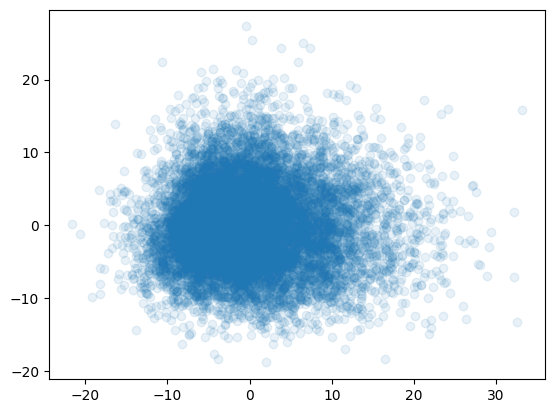

In [20]:
import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.1)
plt.show()

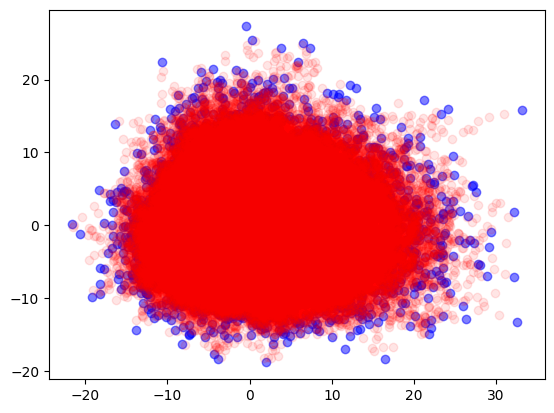

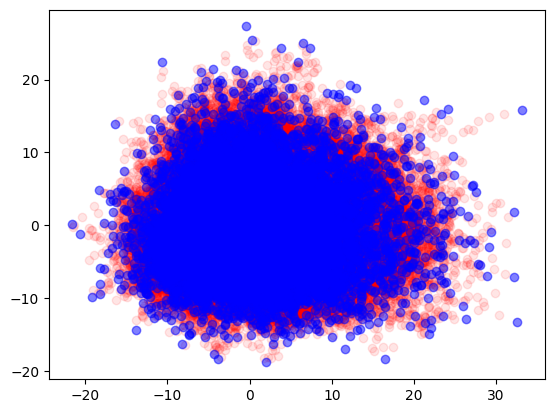

In [21]:
import matplotlib.pyplot as plt

plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b")
plt.scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r")
plt.show()

plt.clf()
plt.cla()
plt.scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r")
plt.scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b")

plt.show()

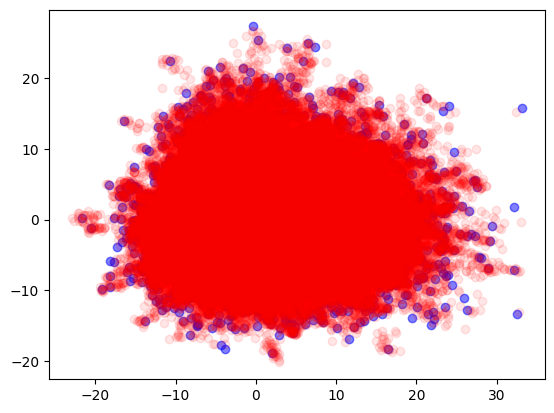

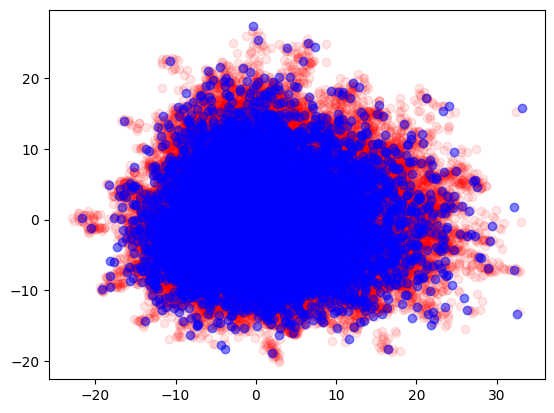

In [22]:
plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")
plt.scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="r")
plt.show()

plt.clf()
plt.cla()
plt.scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="r")
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")

plt.show()

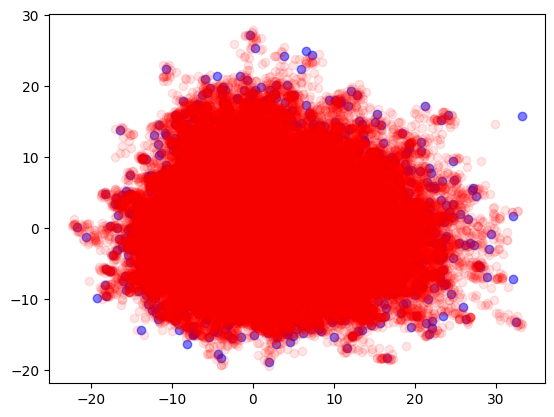

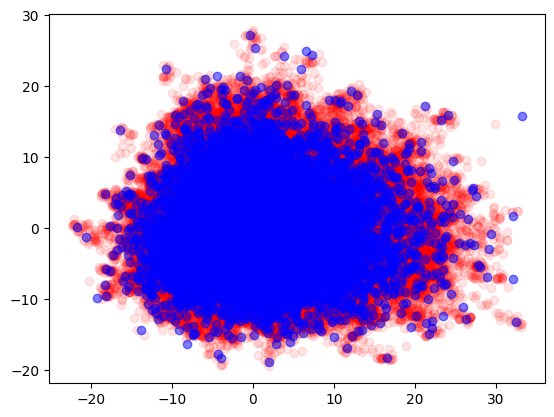

In [23]:
plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")
plt.scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="r")
plt.show()
plt.clf()
plt.cla()
plt.scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="r")
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")
plt.show()

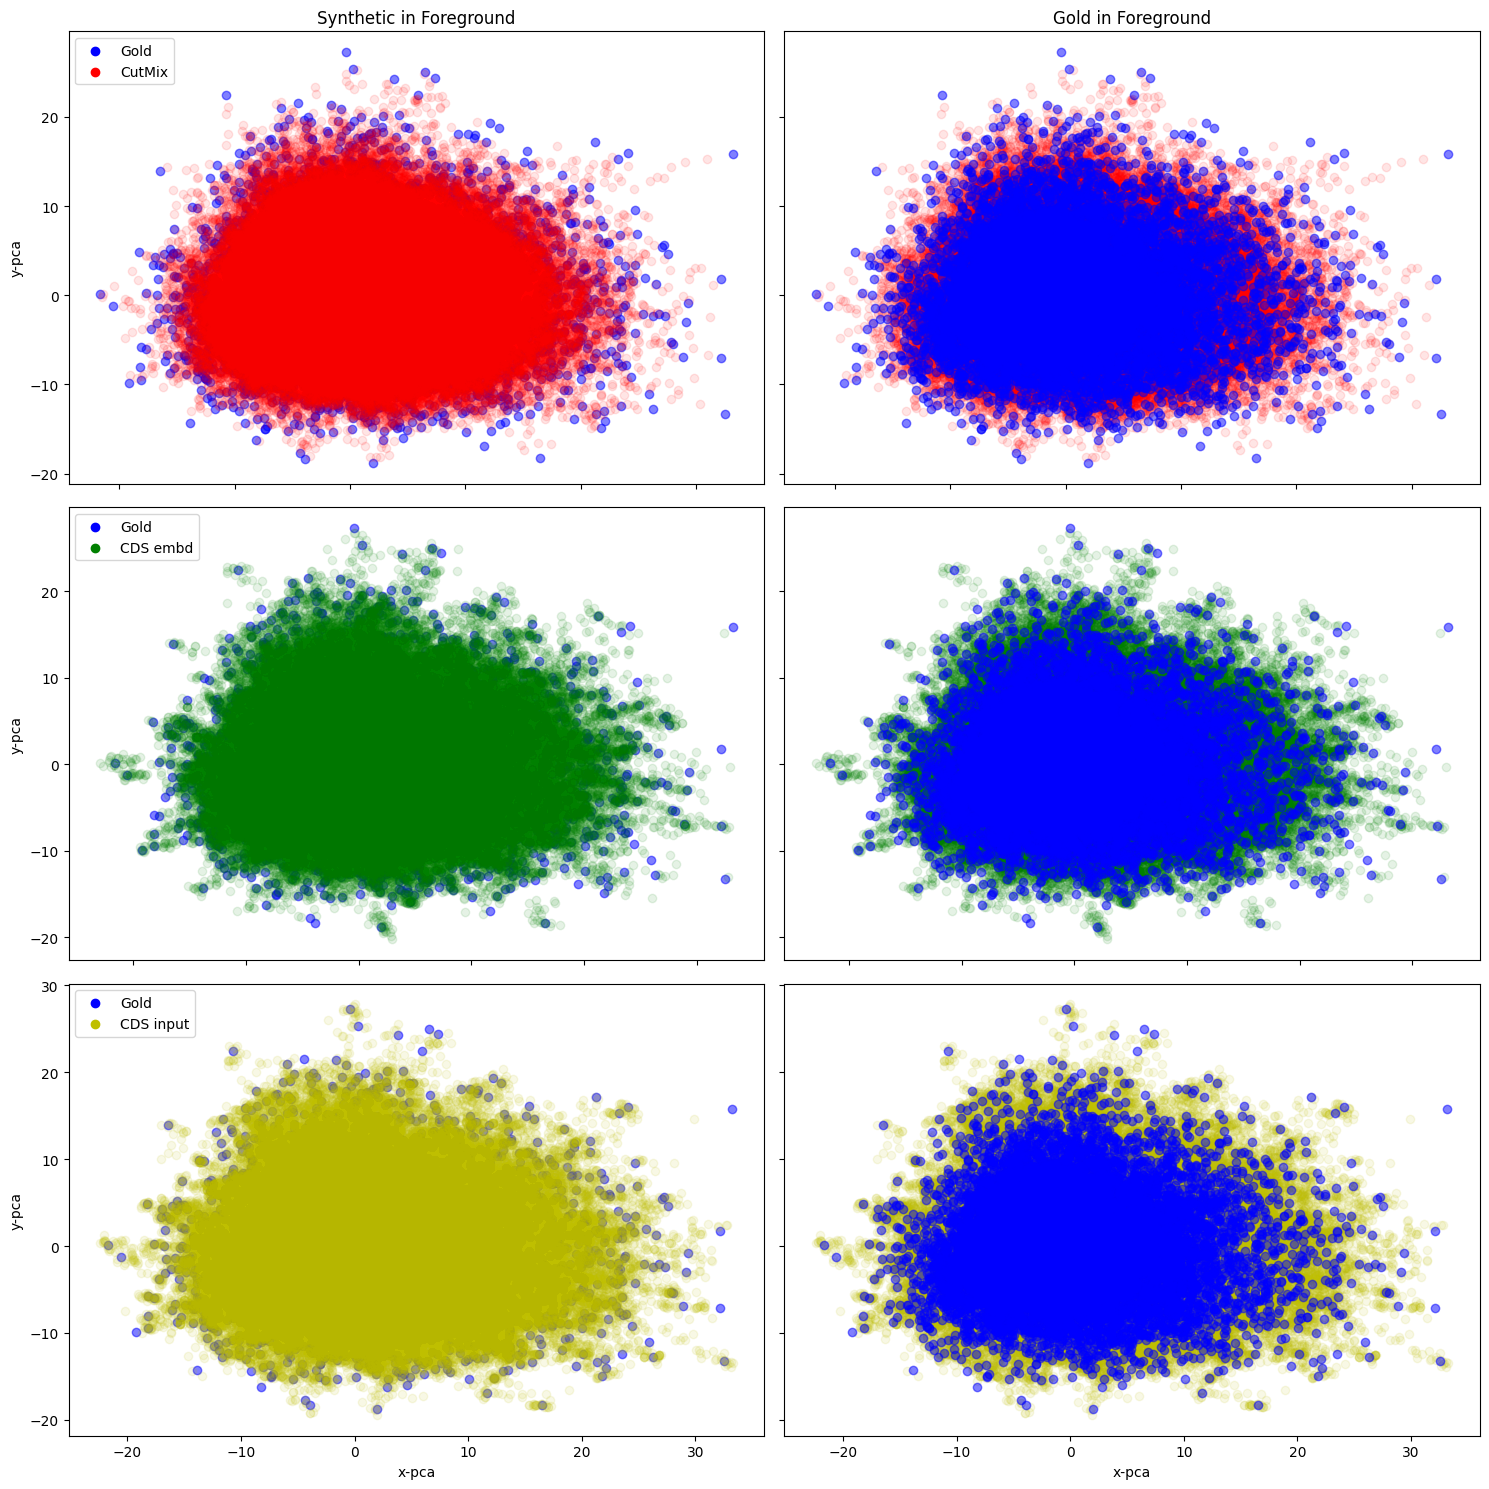

In [24]:
fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b", label="Gold")
axs[0,0].scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r", label="CutMix")
axs[0, 0].set_title('Synthetic in Foreground')
leg = axs[0, 0].legend(loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
axs[0,1].scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r")
axs[0,1].scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b")
axs[0, 1].set_title('Gold in Foreground')




axs[1,0].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b", label="Gold")
axs[1,0].scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="g", label="CDS embd")
leg=axs[1, 0].legend(loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
    
axs[1,1].scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="g")
axs[1,1].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")





axs[2,0].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b", label="Gold")
axs[2,0].scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="y", label="CDS input")
leg=axs[2, 0].legend(loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
axs[2,1].scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="y")
axs[2,1].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")

for ax in axs.flat:
    ax.set(xlabel='x-pca', ylabel='y-pca')
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
fig.show()

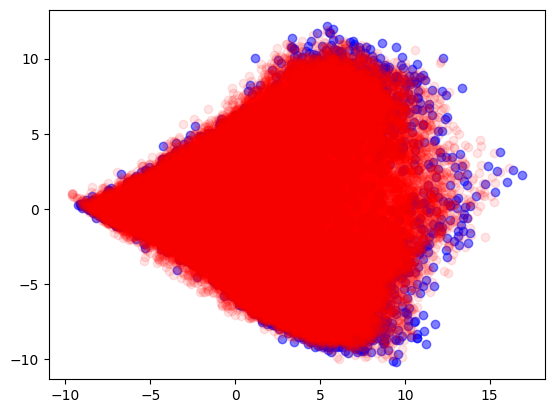

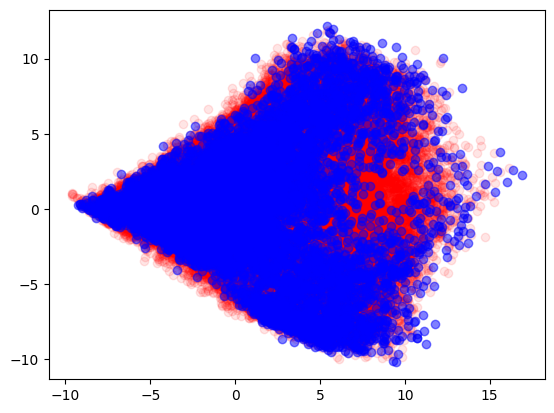

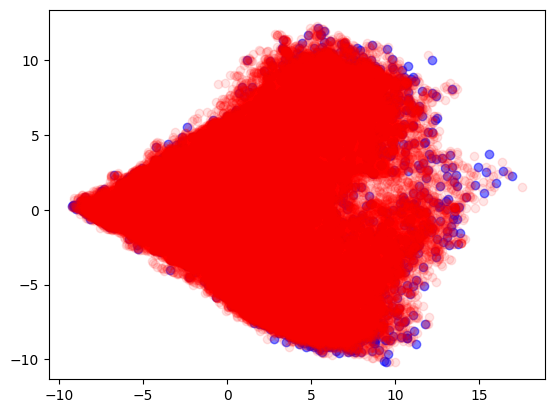

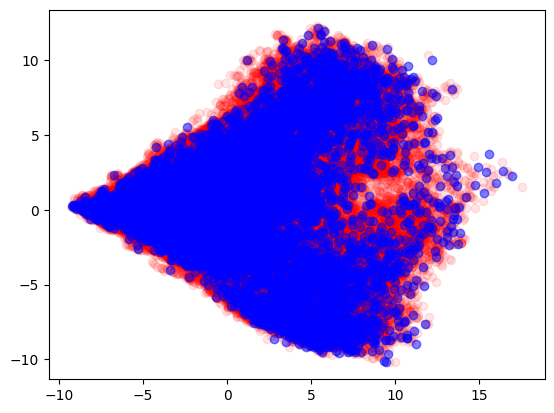

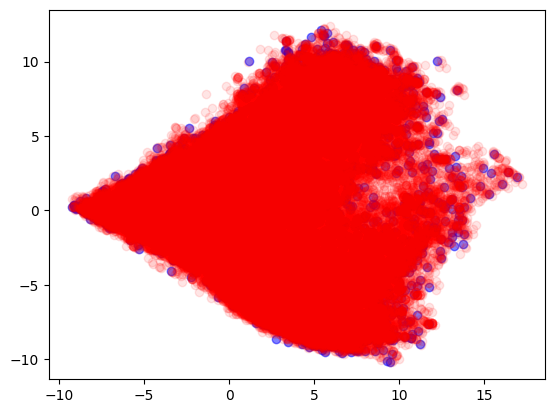

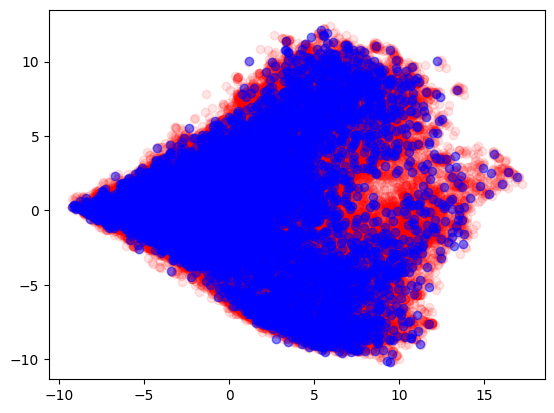

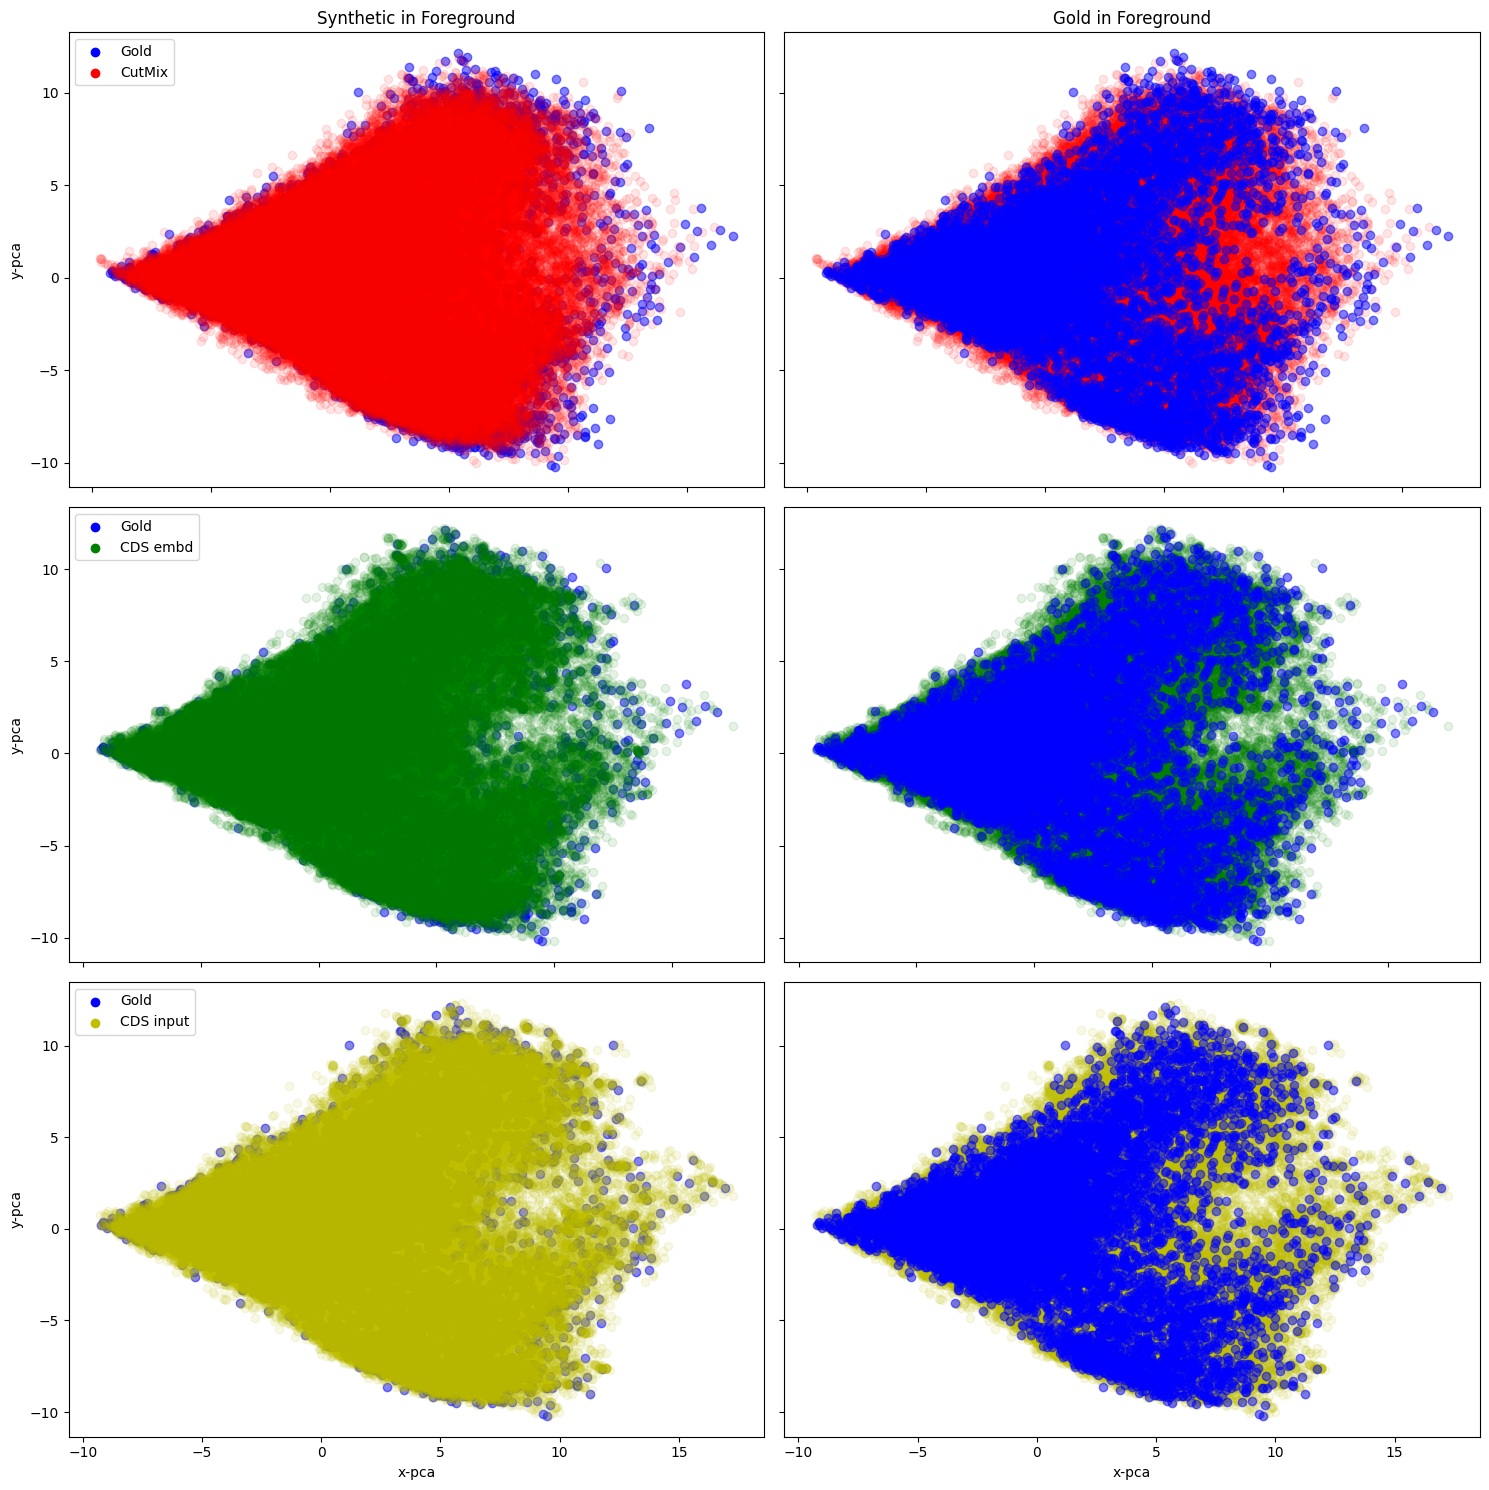

In [25]:
import joblib
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_sadlo-k160_s42_w1_f4.pickle", "rb") as infile:
    sadlo_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_embedding3h-k160_s42_w1_f4.pickle", "rb") as infile:
    emb_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/cutmix-s42.pickle", "rb") as infile:
    cutmix_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/gold_train.pickle", "rb") as infile:
    gold_data = joblib.load(infile)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, method="exact")
pca = PCA(n_components=2)

gold = gold_data[:, :, 131:].reshape(12304, 48*131)
del gold_data
#print(gold[0], gold.dtype)
#tsne.fit(gold)
pca.fit(gold)

pred_cutmix = cutmix_data[:, :, 131:].reshape((246080, 48*131))
del cutmix_data
pred_sadlo = sadlo_data[:, :, 131:].reshape((246080, 48*131))
del sadlo_data
pred_emb = emb_data[:, :, 131:].reshape((246080, 48*131))
del emb_data

gold_transform = pca.transform(gold)
cutmix_transform = pca.transform(pred_cutmix)
sadlo_transform = pca.transform(pred_sadlo)
emb_transform = pca.transform(pred_emb)


import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b")
plt.scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r")
plt.show()

plt.clf()
plt.cla()
plt.scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r")
plt.scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b")

plt.show()


plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")
plt.scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="r")
plt.show()

plt.clf()
plt.cla()
plt.scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="r")
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")

plt.show()


plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")
plt.scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="r")
plt.show()


plt.clf()
plt.cla()
plt.scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="r")
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")

plt.show()


fig, axs = plt.subplots(3, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

axs[0,0].scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b", label="Gold")
axs[0,0].scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r", label="CutMix")
axs[0, 0].set_title('Synthetic in Foreground')
leg=axs[0, 0].legend(loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
axs[0,1].scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1, c="r")
axs[0,1].scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5, c="b")
axs[0, 1].set_title('Gold in Foreground')




axs[1,0].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b", label="Gold")
axs[1,0].scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="g", label="CDS embd")
leg=axs[1, 0].legend(loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
axs[1,1].scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1, c="g")
axs[1,1].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")





axs[2,0].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b", label="Gold")
axs[2,0].scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="y", label="CDS input")
leg=axs[2, 0].legend(loc="upper left")
for lh in leg.legendHandles: 
    lh.set_alpha(1)
axs[2,1].scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1, c="y")
axs[2,1].scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5, c="b")

for ax in axs.flat:
    ax.set(xlabel='x-pca', ylabel='y-pca')
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
fig.show()

In [26]:
"""
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_sadlo-k160_s42_w1_f4.pickle", "rb") as infile:
    sadlo_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_embedding3h-k160_s42_w1_f4.pickle", "rb") as infile:
    emb_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/cutmix-s42.pickle", "rb") as infile:
    cutmix_data = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/gold_train.pickle", "rb") as infile:
    gold_data = joblib.load(infile)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, method="exact")
pca = PCA(n_components=2)

gold = gold_data[:, :, 131:].reshape(12304, 48*131)
del gold_data
#print(gold[0], gold.dtype)
tsne.fit(gold)
#pca.fit(gold)

pred_cutmix = cutmix_data[:, :, 131:].reshape((246080, 48*131))
del cutmix_data
pred_sadlo = sadlo_data[:, :, 131:].reshape((246080, 48*131))
del sadlo_data
pred_emb = emb_data[:, :, 131:].reshape((246080, 48*131))
del emb_data

gold_transform = tsne.transform(gold)
cutmix_transform = tsne.transform(pred_cutmix)
sadlo_transform = tsne.transform(pred_sadlo)
emb_transform = tsne.transform(pred_emb)


import matplotlib.pyplot as plt
plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1], alpha=0.5)
plt.scatter(cutmix_transform[:, 0], cutmix_transform[:, 1],alpha=0.1)
plt.show()

plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5)
plt.scatter(emb_transform[:, 0], emb_transform[:, 1],alpha=0.1)
plt.show()

plt.clf()
plt.cla()
plt.scatter(gold_transform[:, 0], gold_transform[:, 1],alpha=0.5)
plt.scatter(sadlo_transform[:, 0], sadlo_transform[:, 1],alpha=0.1)
plt.show()
"""

'\nwith open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_sadlo-k160_s42_w1_f4.pickle", "rb") as infile:\n    sadlo_data = joblib.load(infile)\nwith open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_embedding3h-k160_s42_w1_f4.pickle", "rb") as infile:\n    emb_data = joblib.load(infile)\nwith open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/cutmix-s42.pickle", "rb") as infile:\n    cutmix_data = joblib.load(infile)\nwith open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/gold_train.pickle", "rb") as infile:\n    gold_data = joblib.load(infile)\nfrom sklearn.decomposition import PCA\nfrom sklearn.manifold import TSNE\n\ntsne = TSNE(n_components=2, method="exact")\npca = PCA(n_components=2)\n\ngold = gold_data[:, :, 131:].reshape(12304, 48*131)\ndel gold_data\n#print(gold[0], gold.dtype)\ntsne.fit(gold)\n

In [1]:
import pickle
import joblib
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_sadlo-k160_s41_w1_f4.pickle", "rb") as infile:
    sadlo_train = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_test/mimic-full/geca-cut_sadlo-k160_s41_w1_f4.pickle", "rb") as infile:
    sadlo_test = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/geca-cut_embedding3h-k160_s42_w1_f4.pickle", "rb") as infile:
    emb_train = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_test/mimic-full/geca-cut_embedding3h-k160_s42_w1_f4.pickle", "rb") as infile:
    emb_test = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/cutmix-s42.pickle", "rb") as infile:
    cutmix_train = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_test/mimic-full/cutmix-s42.pickle", "rb") as infile:
    cutmix_test = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_inputs/mimic-full/gold_train.pickle", "rb") as infile:
    gold_train = joblib.load(infile)
with open("/home/mitarb/hagmann/projects/structures_compositionality/synthetic_test/mimic-full/gold_test.pickle", "rb") as infile:
    gold_test = joblib.load(infile)

In [23]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.LSTM(262, 1000, num_layers=2, batch_first=True)
        self.linear = torch.nn.Linear(1000, 100)
        self.linear2 = torch.nn.Linear(100, 1)
        self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear2(self.activation(self.linear(last_hidden)))
        return self.out_activation(output)

import copy
model = Discriminator().cuda()

current_dataset_train = cutmix_train
current_dataset_test = cutmix_test 

train_pos = gold_train
cutmix_train_copy = copy.deepcopy(current_dataset_train)
np.random.shuffle(cutmix_train_copy)
train_neg = cutmix_train_copy[:train_pos.shape[0]]
train_pos_labels = np.ones(train_pos.shape[0])
train_neg_labels = np.zeros(train_neg.shape[0])
X = np.concatenate([train_pos, train_neg])
Y = np.concatenate([train_pos_labels, train_neg_labels])

test_pos = gold_test
cutmix_test_copy = copy.deepcopy(current_dataset_test)

np.random.shuffle(cutmix_test_copy)
test_neg = cutmix_test_copy[:test_pos.shape[0]]

test_pos_labels = np.ones(test_pos.shape[0])
test_neg_labels = np.zeros(test_neg.shape[0])

X_test = np.concatenate([test_pos, test_neg])
Y_test = np.concatenate([test_pos_labels, test_neg_labels])

loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
for i in range(10):
    shuffled_indices = np.arange(X.shape[0])
    np.random.shuffle(shuffled_indices)
    loss_sum = 0
    for j in range(X.shape[0]//32):
        #print(j)
        curr_shuffled = shuffled_indices[j*32:j*32+32]
        optimizer.zero_grad()
        x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
        out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #print(out, y_inp)
        loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
        loss_sum+=loss.detach().cpu().numpy()
        loss.backward()
        optimizer.step()
    print(loss_sum)
    #raise Exception

outputs, gold = [], []
indices = np.arange(X_test.shape[0])
for j in range(X.shape[0]//32):
    curr_shuffled = indices[j*32:j*32+32]
    x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
    out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
    #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
    outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
    gold.extend(torch.tensor(y_inp).numpy().tolist())
from sklearn.metrics import accuracy_score

print(accuracy_score(gold, outputs))

533.3454297184944
533.0580934286118
533.0940235257149
533.0668360590935
537.827788233757
533.0655038356781
533.0504642128944
533.0547190904617
533.0514825582504
533.0660927891731
0.5


In [24]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.LSTM(262, 1000, num_layers=2, batch_first=True)
        self.linear = torch.nn.Linear(1000, 100)
        self.linear2 = torch.nn.Linear(100, 1)
        self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear2(self.activation(self.linear(last_hidden)))
        return self.out_activation(output)

import copy
model = Discriminator().cuda()

current_dataset_train = cutmix_train
current_dataset_test = cutmix_test 

train_pos = gold_train
cutmix_train_copy = copy.deepcopy(current_dataset_train)
np.random.shuffle(cutmix_train_copy)
train_neg = cutmix_train_copy[:train_pos.shape[0]]
train_pos_labels = np.ones(train_pos.shape[0])
train_neg_labels = np.zeros(train_neg.shape[0])
X = np.concatenate([train_pos, train_neg])
Y = np.concatenate([train_pos_labels, train_neg_labels])

test_pos = gold_test
cutmix_test_copy = copy.deepcopy(current_dataset_test)

np.random.shuffle(cutmix_test_copy)
test_neg = cutmix_test_copy[:test_pos.shape[0]]

test_pos_labels = np.ones(test_pos.shape[0])
test_neg_labels = np.zeros(test_neg.shape[0])

X_test = np.concatenate([test_pos, test_neg])
Y_test = np.concatenate([test_pos_labels, test_neg_labels])

loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
for i in range(10):
    shuffled_indices = np.arange(X.shape[0])
    np.random.shuffle(shuffled_indices)
    loss_sum = 0
    for j in range(X.shape[0]//32):
        #print(j)
        curr_shuffled = shuffled_indices[j*32:j*32+32]
        optimizer.zero_grad()
        x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
        out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #print(out, y_inp)
        loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
        loss_sum+=loss.detach().cpu().numpy()
        loss.backward()
        optimizer.step()
    print(loss_sum)
    #raise Exception

outputs, gold = [], []
indices = np.arange(X_test.shape[0])
for j in range(X.shape[0]//32):
    curr_shuffled = indices[j*32:j*32+32]
    x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
    out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
    #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
    outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
    gold.extend(torch.tensor(y_inp).numpy().tolist())
from sklearn.metrics import accuracy_score

print(accuracy_score(gold, outputs))

536.498251080513
533.192200243473
533.310564994812
533.2563553452492
533.2696571946144
533.293146789074
533.2817122936249
533.2807680368423
533.2079798579216
533.1757400631905
0.5


In [25]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.LSTM(262, 1000, num_layers=2, batch_first=True)
        self.linear = torch.nn.Linear(1000, 100)
        self.linear2 = torch.nn.Linear(100, 1)
        self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear2(self.activation(self.linear(last_hidden)))
        return self.out_activation(output)

import copy
model = Discriminator().cuda()

current_dataset_train = cutmix_train
current_dataset_test = cutmix_test 

train_pos = gold_train
cutmix_train_copy = copy.deepcopy(current_dataset_train)
np.random.shuffle(cutmix_train_copy)
train_neg = cutmix_train_copy[:train_pos.shape[0]]
train_pos_labels = np.ones(train_pos.shape[0])
train_neg_labels = np.zeros(train_neg.shape[0])
X = np.concatenate([train_pos, train_neg])
Y = np.concatenate([train_pos_labels, train_neg_labels])

test_pos = gold_test
cutmix_test_copy = copy.deepcopy(current_dataset_test)

np.random.shuffle(cutmix_test_copy)
test_neg = cutmix_test_copy[:test_pos.shape[0]]

test_pos_labels = np.ones(test_pos.shape[0])
test_neg_labels = np.zeros(test_neg.shape[0])

X_test = np.concatenate([test_pos, test_neg])
Y_test = np.concatenate([test_pos_labels, test_neg_labels])

loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
for i in range(10):
    shuffled_indices = np.arange(X.shape[0])
    np.random.shuffle(shuffled_indices)
    loss_sum = 0
    for j in range(X.shape[0]//32):
        #print(j)
        curr_shuffled = shuffled_indices[j*32:j*32+32]
        optimizer.zero_grad()
        x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
        out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #print(out, y_inp)
        loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
        loss_sum+=loss.detach().cpu().numpy()
        loss.backward()
        optimizer.step()
    print(loss_sum)
    #raise Exception

outputs, gold = [], []
indices = np.arange(X_test.shape[0])
for j in range(X.shape[0]//32):
    curr_shuffled = indices[j*32:j*32+32]
    x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
    out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
    #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
    outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
    gold.extend(torch.tensor(y_inp).numpy().tolist())
from sklearn.metrics import accuracy_score

print(accuracy_score(gold, outputs))

533.2380708456039
533.1964913010597
533.1113351583481
533.0755835771561
532.9152163863182
532.5596895217896
532.1627130508423
530.9187329411507
519.9618998765945
478.4958079457283
0.666579016565869


In [30]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.LSTM(262, 1000, num_layers=2, batch_first=True)
        self.linear = torch.nn.Linear(1000, 100)
        self.linear2 = torch.nn.Linear(100, 1)
        self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear2(self.activation(self.linear(last_hidden)))
        return self.out_activation(output)

import copy
model = Discriminator().cuda()

current_dataset_train = cutmix_train
current_dataset_test = cutmix_test 

train_pos = gold_train
cutmix_train_copy = copy.deepcopy(current_dataset_train)
np.random.shuffle(cutmix_train_copy)
train_neg = cutmix_train_copy[:train_pos.shape[0]]
train_pos_labels = np.ones(train_pos.shape[0])
train_neg_labels = np.zeros(train_neg.shape[0])
X = np.concatenate([train_pos, train_neg])
Y = np.concatenate([train_pos_labels, train_neg_labels])

test_pos = gold_test
cutmix_test_copy = copy.deepcopy(current_dataset_test)

np.random.shuffle(cutmix_test_copy)
test_neg = cutmix_test_copy[:test_pos.shape[0]]

test_pos_labels = np.ones(test_pos.shape[0])
test_neg_labels = np.zeros(test_neg.shape[0])

X_test = np.concatenate([test_pos, test_neg])
Y_test = np.concatenate([test_pos_labels, test_neg_labels])

loss_func = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)
best_loss = 1000000
best_model = copy.deepcopy(model)
for i in range(20):
    shuffled_indices = np.arange(X.shape[0])
    np.random.shuffle(shuffled_indices)
    loss_sum = 0
    for j in range(X.shape[0]//32):
        #print(j)
        curr_shuffled = shuffled_indices[j*32:j*32+32]
        optimizer.zero_grad()
        x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
        out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #print(out, y_inp)
        loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
        loss_sum+=loss.detach().cpu().numpy()
        loss.backward()
        optimizer.step()
    print(loss_sum)
    if loss_sum <= best_loss:
        best_loss = loss_sum
        best_model = copy.deepcopy(model)
    #raise Exception

outputs, gold = [], []
indices = np.arange(X_test.shape[0])
for j in range(X.shape[0]//32):
    curr_shuffled = indices[j*32:j*32+32]
    x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
    out = best_model(torch.tensor(x_inp, dtype=torch.float32).cuda())
    #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
    outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
    gold.extend(torch.tensor(y_inp).numpy().tolist())
from sklearn.metrics import accuracy_score

print(accuracy_score(gold, outputs))

533.0977017879486
533.0511412620544
533.0353398323059
533.0071321725845
532.9768015146255
532.9054377675056
532.8742329478264
532.7638114094734
532.3900071382523
528.6901907920837
521.9234235882759
511.4427013993263
497.39871340990067
482.67059311270714
471.2691738605499
462.25445863604546
452.49601897597313
443.46470353007317
435.2922875583172
427.35697543621063


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:775: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


0.7075992637391533


In [36]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.GRU(262, 131, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(131, 1)
        #self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear(last_hidden)
        return self.out_activation(output)

import copy
collection = list() 
for i in range(10):
    current_dataset_train = cutmix_train
    current_dataset_test = cutmix_test 
    model = Discriminator().cuda()
    train_pos = gold_train
    cutmix_train_copy = copy.deepcopy(current_dataset_train)
    np.random.shuffle(cutmix_train_copy)
    train_neg = cutmix_train_copy[:train_pos.shape[0]]
    train_pos_labels = np.ones(train_pos.shape[0])
    train_neg_labels = np.zeros(train_neg.shape[0])
    X = np.concatenate([train_pos, train_neg])
    Y = np.concatenate([train_pos_labels, train_neg_labels])

    test_pos = gold_test
    cutmix_test_copy = copy.deepcopy(current_dataset_test)

    np.random.shuffle(cutmix_test_copy)
    test_neg = cutmix_test_copy[:test_pos.shape[0]]

    test_pos_labels = np.ones(test_pos.shape[0])
    test_neg_labels = np.zeros(test_neg.shape[0])

    X_test = np.concatenate([test_pos, test_neg])
    Y_test = np.concatenate([test_pos_labels, test_neg_labels])

    loss_func = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    best_loss = 1000000
    best_model = copy.deepcopy(model)
    for i in range(20):
        shuffled_indices = np.arange(X.shape[0])
        np.random.shuffle(shuffled_indices)
        loss_sum = 0
        for j in range(X.shape[0]//32):
            #print(j)
            curr_shuffled = shuffled_indices[j*32:j*32+32]
            optimizer.zero_grad()
            x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
            out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
            #print(out, y_inp)
            loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
            loss_sum+=loss.detach().cpu().numpy()
            loss.backward()
            optimizer.step()
        print(loss_sum)
        if loss_sum <= best_loss:
            best_loss = loss_sum
            best_model = copy.deepcopy(model)
        #raise Exception

    outputs, gold = [], []
    indices = np.arange(X_test.shape[0])
    for j in range(X.shape[0]//32):
        curr_shuffled = indices[j*32:j*32+32]
        x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
        out = best_model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
        outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
        gold.extend(torch.tensor(y_inp).numpy().tolist())
    from sklearn.metrics import accuracy_score

    collection.append(accuracy_score(gold, outputs))
print(np.mean(collection), np.std(collection))

534.9855252504349
532.8773985505104
497.01089695096016
407.10448375344276
328.06031396985054
263.30116456747055
214.04806294292212
179.75928489863873
148.0878294147551
124.21146396454424
103.24203671235591
86.27888779062778
76.3523062360473
66.75990360695869
53.25585534586571
49.49698379286565
45.32425069529563
36.972981626866385
37.887461566599086
35.138164241740014


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


535.0178065896034
527.0884826183319
445.32163485884666
330.2266539633274
262.7681761160493
216.88811941444874
180.4367542900145
150.84509339556098
126.07523268833756
107.76562132500112
89.8141427738592
77.33454717881978
69.02454319922253
57.298947324743494
50.60048149316572
45.70695853384677
43.428720009629615
36.19953111675568
35.39060433197301
31.24520525173284


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


534.5795648097992
524.3253352046013
424.53365433216095
340.57319843769073
272.7923866212368
222.49653500318527
186.33488871902227
157.405522570014
132.09170277416706
114.6692971996963
95.67491175606847
82.09652787912637
70.1597507270053
62.12639990984462
52.92148143937811
46.00248176930472
44.60618461458944
34.47910533065442
35.381476775568444
33.16706114425324


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


535.0293171405792
533.3039271235466
508.7335558831692
395.1272868216038
295.1846703737974
239.0162277445197
196.9020165503025
164.1948018744588
138.24259408563375
117.19056749530137
98.16653730161488
82.54634845722467
67.52056311164051
59.45551547547802
49.86547425435856
44.780605791602284
38.29800226725638
32.4987171953544
31.70141741941916
30.244733005121816


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


535.0520843267441
528.0840233564377
431.0158104002476
323.9605932235718
256.21575512737036
210.3532928302884
179.083352830261
152.64890123158693
132.27861501835287
111.18623799830675
99.45634745247662
84.58253517653793
72.82069349801168
62.51301232352853
55.76585488184355
49.27234551764559
44.06684931740165
41.41832886496559
39.7248658555327
35.46999119769316


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


534.8087195754051
533.2382054924965
470.3020524382591
359.5422632843256
292.16940911114216
231.4394386485219
188.75121065601707
158.70457675680518
134.5092501975596
109.51430262811482
90.90149121684954
78.22697016503662
67.33651470765471
58.57779524824582
49.46928932261653
46.88003623788245
39.475225573871285
39.12762648751959
30.25972598255612
29.989287976932246


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


535.2933465838432
530.8140614032745
470.13327673077583
375.06132708489895
295.1609677672386
235.58751299232244
185.50856863334775
153.0004647411406
130.07541728019714
108.82112917583436
91.12463962798938
80.31779353599995
68.14399685151875
58.61603211471811
52.5170323504135
43.44515156734269
39.110516653745435
37.743200642988086
33.02455168013694
28.97407597739948


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


534.997751891613
533.3808953762054
518.8910521864891
405.75678184628487
300.16772282123566
236.1621581017971
194.02115562930703
164.73427345976233
137.05693870782852
116.9473395422101
96.603326424025
84.46928727487102
72.29411180596799
65.30345251783729
52.37539781839587
44.45615236845333
43.454598118551075
38.74392865924165
35.84212974854745
28.958500743145123


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


535.3223400115967
533.2430503964424
525.5313506126404
426.5330653190613
328.8898019492626
270.8517021909356
217.96380890905857
178.18040943145752
145.20890004187822
121.53456109948456
101.28303225617856
86.42567626573145
76.46751231467351
63.736389302648604
53.44361632410437
52.89868144807406
43.45221872953698
43.57921686721966
37.88202649692539
35.00077693199273


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


535.3521971702576
533.2386375665665
476.40863648056984
368.7255184352398
297.513091519475
247.13175050914288
207.54407814890146
174.57741760835052
146.96066041104496
123.6511149071157
104.24743762146682
86.27611560095102
74.10321241500787
65.65110581554472
57.69019729690626
50.64352157362737
43.155380468349904
39.30291583167855
34.03913996415213
32.128013869107235


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


0.8838022613726005 0.004272355792172068


# ab Hier andere Sachen

In [37]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.GRU(262, 131, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(131, 1)
        #self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear(last_hidden)
        return self.out_activation(output)

import copy


collection = list() 
for i in range(10):
    current_dataset_train = sadlo_train
    current_dataset_test = sadlo_test 
    model = Discriminator().cuda()
    train_pos = gold_train
    cutmix_train_copy = copy.deepcopy(current_dataset_train)
    np.random.shuffle(cutmix_train_copy)
    train_neg = cutmix_train_copy[:train_pos.shape[0]]
    train_pos_labels = np.ones(train_pos.shape[0])
    train_neg_labels = np.zeros(train_neg.shape[0])
    X = np.concatenate([train_pos, train_neg])
    Y = np.concatenate([train_pos_labels, train_neg_labels])

    test_pos = gold_test
    cutmix_test_copy = copy.deepcopy(current_dataset_test)

    np.random.shuffle(cutmix_test_copy)
    test_neg = cutmix_test_copy[:test_pos.shape[0]]

    test_pos_labels = np.ones(test_pos.shape[0])
    test_neg_labels = np.zeros(test_neg.shape[0])

    X_test = np.concatenate([test_pos, test_neg])
    Y_test = np.concatenate([test_pos_labels, test_neg_labels])

    loss_func = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    best_loss = 1000000
    best_model = copy.deepcopy(model)
    for i in range(20):
        shuffled_indices = np.arange(X.shape[0])
        np.random.shuffle(shuffled_indices)
        loss_sum = 0
        for j in range(X.shape[0]//32):
            #print(j)
            curr_shuffled = shuffled_indices[j*32:j*32+32]
            optimizer.zero_grad()
            x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
            out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
            #print(out, y_inp)
            loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
            loss_sum+=loss.detach().cpu().numpy()
            loss.backward()
            optimizer.step()
        print(loss_sum)
        if loss_sum <= best_loss:
            best_loss = loss_sum
            best_model = copy.deepcopy(model)
        #raise Exception

    outputs, gold = [], []
    indices = np.arange(X_test.shape[0])
    for j in range(X.shape[0]//32):
        curr_shuffled = indices[j*32:j*32+32]
        x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
        out = best_model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
        outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
        gold.extend(torch.tensor(y_inp).numpy().tolist())
    from sklearn.metrics import accuracy_score

    collection.append(accuracy_score(gold, outputs))
print(np.mean(collection), np.std(collection))

450.887342274189
430.73823004961014
411.2915317118168
370.7350516617298
345.43117086589336
324.22613501548767
302.3196517676115
282.5060039013624
261.41498628258705
237.43981330096722
215.6487168893218
198.3071322068572
176.31494385004044
160.20913650281727
142.87172130681574
129.5151981152594
123.70136042870581
105.81064553325996
96.30054985452443
89.42270728573203


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


448.67182874679565
428.6821137666702
407.54549819231033
367.8213357925415
325.2110470980406
282.7679485976696
273.50229543447495
236.93545457720757
214.3880431726575
193.16720404475927
178.3935330659151
154.35854193381965
138.66347309947014
118.36732248775661
109.30354471877217
106.64431107416749
88.5138081535697
83.90015017800033
76.67170067224652
75.67277238238603


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


448.43349781632423
426.13390639424324
380.92073675990105
321.81692799925804
283.83883699029684
260.5400316119194
234.45414197444916
216.9489609375596
193.80190332978964
175.17391742020845
157.52148039452732
142.15814074128866
126.50057226791978
112.80521344020963
105.5884184492752
97.18473523203284
84.70438284659758
81.04975588154048
81.13625537138432
75.58496276196092


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


452.93745121359825
419.11036363244057
376.0225115120411
347.4679896682501
306.8478102236986
273.820973187685
249.1224058419466
226.38000812381506
202.68506620824337
181.905718293041
167.5728324726224
147.2341651841998
132.8588168695569
119.1719594784081
105.62304239720106
100.64314207993448
89.39925074530765
79.73758893087506
75.8797154771164
69.19613866356667


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


447.84388944506645
426.0863883793354
388.17097291350365
353.7587236613035
323.7201887816191
288.72183622419834
265.01550107449293
244.82475565373898
221.4795053228736
198.20662803947926
178.16484279558063
162.74836863949895
143.53854352235794
129.6320020519197
113.36083365045488
105.73391193989664
95.96903819125146
83.43470256496221
79.79469256661832
72.22776668798178


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


451.7637009322643
427.7415337562561
438.8504469394684
390.74002331495285
366.5706182420254
349.4818641245365
333.4661952406168
313.94810427725315
290.85847644507885
266.23670138418674
240.50676310807467
221.19376873970032
199.440879881382
177.38132045418024
159.18519781902432
143.7446961402893
125.95046401582658
114.51038679853082
103.60258198715746
91.3155231801793


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


453.4799221754074
431.0042525231838
400.75455686450005
362.24265909194946
324.07991963624954
285.7547324746847
256.33429700136185
234.60692647099495
210.74344508349895
189.43700240552425
172.0910580381751
153.44880590215325
133.6068484019488
122.03926152270287
106.5401295106858
101.97775291558355
89.78263031318784
79.01296575274318
68.27769726072438
74.6452565533109


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


448.69144690036774
425.24923941493034
387.76959151029587
335.2260780185461
295.41803781688213
267.16708655655384
245.83512976020575
220.6109573021531
207.32529381662607
189.56153658032417
178.1948779337108
160.19087561406195
139.11856649443507
129.20446471497416
119.56012792978436
108.32711669616401
108.53779274225235
91.82395404670388
77.43548645172268
91.6086754319258


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


450.5538930594921
429.4506911635399
404.0086296200752
366.8793344795704
326.4666662067175
286.19985458254814
259.5765820145607
242.4641331359744
219.25359945744276
204.01263404637575
183.26023659855127
162.86907332763076
147.22719277441502
134.8827235326171
120.86815012432635
108.3376883128658
101.4065778623335
113.39439371228218
82.21064181625843
80.58998137805611


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


449.42215728759766
428.0409942269325
408.41237020492554
360.3000292778015
309.68269877135754
279.99896728247404
251.31740425527096
228.98907884955406
209.19796516746283
192.05000147596002
169.83902709931135
152.39725188538432
135.25762804970145
119.66464166995138
109.2936641946435
104.56573678273708
94.7194205923006
80.72655566083267
78.27187600405887
82.01448815967888


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


0.8057980541677623 0.00793862814688574


In [38]:
import torch
import numpy as np

class Discriminator(torch.nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.lstm = torch.nn.GRU(262, 131, num_layers=1, batch_first=True)
        self.linear = torch.nn.Linear(131, 1)
        #self.activation = torch.nn.ReLU()
        self.out_activation = torch.nn.Sigmoid()
    def forward(self, X):
        lstm_outputs, _ = self.lstm(X)
        last_hidden = lstm_outputs[:, -1]
        output = self.linear(last_hidden)
        return self.out_activation(output)

import copy
collection = list() 
for i in range(10):
    current_dataset_train = emb_train
    current_dataset_test = emb_test 
    model = Discriminator().cuda()
    train_pos = gold_train
    cutmix_train_copy = copy.deepcopy(current_dataset_train)
    np.random.shuffle(cutmix_train_copy)
    train_neg = cutmix_train_copy[:train_pos.shape[0]]
    train_pos_labels = np.ones(train_pos.shape[0])
    train_neg_labels = np.zeros(train_neg.shape[0])
    X = np.concatenate([train_pos, train_neg])
    Y = np.concatenate([train_pos_labels, train_neg_labels])

    test_pos = gold_test
    cutmix_test_copy = copy.deepcopy(current_dataset_test)

    np.random.shuffle(cutmix_test_copy)
    test_neg = cutmix_test_copy[:test_pos.shape[0]]

    test_pos_labels = np.ones(test_pos.shape[0])
    test_neg_labels = np.zeros(test_neg.shape[0])

    X_test = np.concatenate([test_pos, test_neg])
    Y_test = np.concatenate([test_pos_labels, test_neg_labels])

    loss_func = torch.nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    best_loss = 1000000
    best_model = copy.deepcopy(model)
    for i in range(20):
        shuffled_indices = np.arange(X.shape[0])
        np.random.shuffle(shuffled_indices)
        loss_sum = 0
        for j in range(X.shape[0]//32):
            #print(j)
            curr_shuffled = shuffled_indices[j*32:j*32+32]
            optimizer.zero_grad()
            x_inp, y_inp = X[curr_shuffled], Y[curr_shuffled]
            out = model(torch.tensor(x_inp, dtype=torch.float32).cuda())
            #print(out, y_inp)
            loss = loss_func(out.squeeze(), torch.tensor(y_inp, dtype=torch.float32).cuda().squeeze())
            loss_sum+=loss.detach().cpu().numpy()
            loss.backward()
            optimizer.step()
        print(loss_sum)
        if loss_sum <= best_loss:
            best_loss = loss_sum
            best_model = copy.deepcopy(model)
        #raise Exception

    outputs, gold = [], []
    indices = np.arange(X_test.shape[0])
    for j in range(X.shape[0]//32):
        curr_shuffled = indices[j*32:j*32+32]
        x_inp, y_inp = X_test[curr_shuffled], Y_test[curr_shuffled]
        out = best_model(torch.tensor(x_inp, dtype=torch.float32).cuda())
        #loss = loss_func(out, torch.tensor(y_inp, dtype=torch.long).cuda().squeeze())
        outputs.extend((out >= 0.5).detach().cpu().numpy().tolist())
        gold.extend(torch.tensor(y_inp).numpy().tolist())
    from sklearn.metrics import accuracy_score

    collection.append(accuracy_score(gold, outputs))
print(np.mean(collection), np.std(collection))

454.3295094072819
431.4054498076439
426.7513458132744
421.77457574009895
385.2243037521839
323.9282105267048
288.9578307271004
265.6383481025696
242.06148126721382
218.00174140930176
199.46327799931169
177.33627980947495
156.22848302684724
141.38845424726605
129.01634965464473
111.44126261305064
103.10765128023922
92.69887155108154
89.80908032879233
79.34152376907878


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


454.6446722149849
432.72974744439125
429.35231322050095
403.5526079237461
331.0980295240879
294.4617655277252
266.7196698784828
244.93502800166607
225.98250759392977
204.62870429456234
185.64261773601174
163.53081664443016
148.66769964993
136.00743587873876
118.5705168992281
103.95855362759903
96.72961158677936
85.09282207628712
85.60089635755867
75.06901020440273


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


450.9325725734234
429.540919393301
425.829447299242
399.8799312710762
339.0398485660553
295.62771236896515
279.8576752245426
251.16571807861328
233.53303007036448
218.37309553474188
198.89440178871155
178.6170142814517
170.52866242825985
146.7461066953838
150.5070656836033
122.45085307583213
106.41319294087589
98.93657978624105
88.6144024352543
96.15011324733496


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


456.7527242898941
435.3120076060295
421.5139889419079
353.35634049773216
306.7428500056267
282.53899405896664
260.67795084416866
239.51170504838228
221.41967134177685
215.06000069528818
189.69284795224667
170.11985700204968
153.00763814523816
138.39027684926987
140.55963891744614
115.85959852859378
107.07393665611744
101.13525604456663
94.02984957583249
82.75621019210666


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


457.85842606425285
435.0828163921833
434.5268815457821
425.9243737459183
405.46771293878555
357.554374307394
304.9184077680111
275.95318599790335
248.0756065696478
220.7832659482956
198.03624288737774
176.63460741192102
154.2100673429668
140.16604072973132
124.99523310922086
112.88081126846373
98.48179935757071
87.34850297542289
90.61510731093585
75.72736061923206


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


454.7479148209095
432.23851415514946
427.7751224040985
415.9861463010311
385.1084788739681
352.0348326563835
303.85051968693733
268.8624381273985
237.884763777256
213.48471572250128
188.83595878630877
166.93753575906157
149.50696297734976
129.61149117164314
111.92484705336392
102.44708231836557
88.67270414577797
89.26580331008881
84.22741340193897
74.21396077051759


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


455.068361222744
434.4379201233387
430.2873706519604
418.71681877970695
392.41460570693016
347.5989107787609
304.6881155073643
265.5198936313391
238.59043837338686
216.7108153924346
196.84363062679768
177.49507566541433
158.62622966244817
144.34605490230024
130.6228819489479
127.20166271552444
111.92075332347304
97.66347968764603
90.65077487006783
83.55994640663266


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


457.10263857245445
435.644790828228
427.2530356347561
400.63783407211304
372.7338887155056
347.4336031973362
321.2977305352688
293.6087199449539
264.43219344317913
238.3108205795288
209.88386998325586
186.6124022938311
168.3213988095522
145.25285783410072
128.8899571094662
114.77041935734451
102.4140749592334
90.70753474533558
81.6076406869106
79.05431714467704


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


452.3246635198593
432.8168929517269
428.68757727742195
422.76540875434875
372.4595301300287
317.29670786857605
291.04540807008743
270.8515176028013
248.2540128827095
230.1677349731326
211.79951457679272
197.7328451424837
179.16606785729527
161.77060858160257
141.55681961402297
137.36228238604963
121.7367482315749
113.92725754156709
100.69193593412638
96.1065322458744


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


456.8076266348362
434.2735207080841
428.9901620745659
415.08215975761414
356.55795699357986
305.4489091336727
276.9646652340889
254.01174047589302
228.83653958886862
209.53526704758406
203.62880820780993
173.66412645950913
152.40722377970815
136.31507687456906
137.5516498144716
113.53280328400433
98.18225451558828
89.10353120975196
95.96060247346759
80.15518346847966


/home/mitarb/staniek/anaconda3/envs/strats_pytorch/lib/python3.7/site-packages/torch/nn/modules/rnn.py:956: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at ../aten/src/ATen/native/cudnn/RNN.cpp:968.)
  self.dropout, self.training, self.bidirectional, self.batch_first)


0.8010518012095714 0.0074914998013788855
